In [1]:
import wfdb as wf
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import biosppy.signals
import pywt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
Normal=['N','.']
Anomalie=['L','R','B','A','a','J','S','V','r',
         'F','e','j','n','E','/','f','Q','?']
NonBeat=['[','!',']','x','(',')','P','t','u',
        '`',"'",'^','|','~','+','s','T','*',
        'D','=','"', '@']

In [3]:
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

# Changement des deux exceptions de Rpeaks

## 108

In [4]:
record108 = wf.rdsamp('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//108', sampto=5000)

In [5]:
rpeak108=biosppy.signals.ecg.hamilton_segmenter(signal=record108[0][:,0], sampling_rate=360.0)

In [6]:
rpeak108[0]

array([  88,  441,  790, 1079, 1155, 1492, 1821, 2157, 2501, 2517, 2883,
       2889, 3237, 3593, 3925, 4103, 4603, 4971])

In [7]:
len(rpeak108[0])

18

In [8]:
L=[]
for i in range(len(rpeak108[0])):
    L.append(rpeak108[0][i])

In [9]:
L.pop(10)

2883

In [10]:
L.pop(8)

2501

In [11]:
L.pop(3)

1079

In [12]:
rpeak108=np.array(L)

In [13]:
rpeak108

array([  88,  441,  790, 1155, 1492, 1821, 2157, 2517, 2889, 3237, 3593,
       3925, 4103, 4603, 4971])

## 116

In [14]:
record116 = wf.rdsamp('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//116', sampto=5000)

In [15]:
rpeak116=biosppy.signals.ecg.hamilton_segmenter(signal=record116[0][:,0], sampling_rate=360.0)

In [16]:
rpeak116[0]

array([  16,  284,  562,  838, 1105, 1370, 1640, 1910, 2181, 2448, 2720,
       2988, 3256, 3530, 3797, 4067, 4345, 4615, 4887])

In [17]:
len(rpeak116[0])

19

In [18]:
L=[]
for i in range(len(rpeak116[0])):
    L.append(rpeak116[0][i])

In [19]:
len(L)

19

In [20]:
L.pop()

4887

In [21]:
len(L)

18

In [22]:
rpeak116=np.array(L)

In [23]:
rpeak116

array([  16,  284,  562,  838, 1105, 1370, 1640, 1910, 2181, 2448, 2720,
       2988, 3256, 3530, 3797, 4067, 4345, 4615])

In [24]:
rpeak116[0]

16

# Generalisation

In [25]:
record = wf.rdsamp('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//100', sampto=5000)

In [26]:
rpeak=biosppy.signals.ecg.hamilton_segmenter(signal=record[0][:,0], sampling_rate=360.0)

In [27]:
rpeak[0]

array([  77,  370,  663,  947, 1231, 1515, 1809, 2045, 2403, 2706, 2998,
       3283, 3560, 3863, 4171, 4466, 4765])

In [28]:
seg=biosppy.signals.ecg.extract_heartbeats(signal=record108[0][:,0], rpeaks=rpeak[0], sampling_rate=360.0, before=0.2, after=0.3)

In [29]:
seg

ReturnTuple(templates=array([[-0.125, -0.125, -0.125, ..., -0.165, -0.17 , -0.19 ],
       [-0.34 , -0.34 , -0.33 , ..., -0.24 , -0.25 , -0.245],
       [-0.25 , -0.285, -0.28 , ..., -0.285, -0.27 , -0.265],
       ...,
       [ 0.035,  0.065,  0.13 , ..., -0.28 , -0.265, -0.245],
       [-0.19 , -0.195, -0.19 , ..., -0.225, -0.205, -0.21 ],
       [-0.02 , -0.04 , -0.045, ..., -0.14 , -0.105, -0.125]]), rpeaks=array([  77,  370,  663,  947, 1231, 1515, 1809, 2045, 2403, 2706, 2998,
       3283, 3560, 3863, 4171, 4466, 4765]))

In [30]:
seg[0]

array([[-0.125, -0.125, -0.125, ..., -0.165, -0.17 , -0.19 ],
       [-0.34 , -0.34 , -0.33 , ..., -0.24 , -0.25 , -0.245],
       [-0.25 , -0.285, -0.28 , ..., -0.285, -0.27 , -0.265],
       ...,
       [ 0.035,  0.065,  0.13 , ..., -0.28 , -0.265, -0.245],
       [-0.19 , -0.195, -0.19 , ..., -0.225, -0.205, -0.21 ],
       [-0.02 , -0.04 , -0.045, ..., -0.14 , -0.105, -0.125]])

In [31]:
for i in range(len(patients)):
    if (patients[i]=='108'):
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record108[0][:,0], rpeaks=rpeak108, sampling_rate=360.0, before=0.2, after=0.4)
        rpeak0=rpeak108
    elif (patients[i]=='116'):
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record116[0][:,0], rpeaks=rpeak116, sampling_rate=360.0, before=0.2, after=0.4)
        rpeak0=rpeak116
    else:
        record= wf.rdsamp('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//'+patients[i], sampto=5000)
        rpeak=biosppy.signals.ecg.hamilton_segmenter(signal=record[0][:,0], sampling_rate=360.0)
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record[0][:,0], rpeaks=rpeak[0], sampling_rate=360.0, before=0.2, after=0.4)
        rpeak0=rpeak[0]
    if (len(seg[0])>len(rpeak0)):
        print(patients[i]+'nombre de segment supérieur', len(seg[0])-len(rpeak0),)
    elif (len(seg[0])<len(rpeak0)):
        print(patients[i]+'nombre de rpeak supérieur', len(seg[0])-len(rpeak0))

101nombre de rpeak supérieur -1
102nombre de rpeak supérieur -1
103nombre de rpeak supérieur -1
104nombre de rpeak supérieur -1
105nombre de rpeak supérieur -1
106nombre de rpeak supérieur -1
107nombre de rpeak supérieur -1
108nombre de rpeak supérieur -1
109nombre de rpeak supérieur -1
112nombre de rpeak supérieur -1
116nombre de rpeak supérieur -1
118nombre de rpeak supérieur -2
119nombre de rpeak supérieur -1
122nombre de rpeak supérieur -1
123nombre de rpeak supérieur -1
200nombre de rpeak supérieur -1
201nombre de rpeak supérieur -1
203nombre de rpeak supérieur -1
207nombre de rpeak supérieur -2
208nombre de rpeak supérieur -1
210nombre de rpeak supérieur -1
212nombre de rpeak supérieur -1
213nombre de rpeak supérieur -1
214nombre de rpeak supérieur -1
215nombre de rpeak supérieur -1
219nombre de rpeak supérieur -1
220nombre de rpeak supérieur -1
222nombre de rpeak supérieur -1
233nombre de rpeak supérieur -2
234nombre de rpeak supérieur -1


In [32]:
len(seg[0]), len(rpeak108)

(20, 15)

In [33]:
Coef=pywt.dwt(seg[0][0],'rbio6.8')

In [34]:
features=[]
for row in Coef[0]:
    features.append(row)

In [35]:
Coef[0]

array([-0.07411026, -0.08265125, -0.1110947 , -0.09214069, -0.07145023,
       -0.11161052, -0.09599815, -0.07660883, -0.06713105, -0.02986175,
       -0.02500795, -0.01177528,  0.02124508,  0.05421748,  0.10491793,
        0.16220804,  0.18869447,  0.14994322,  0.13926879,  0.14179764,
        0.14393874,  0.09719427,  0.01640839, -0.06845881, -0.1256442 ,
       -0.11865806, -0.10967794, -0.12658594, -0.15353141, -0.1791652 ,
       -0.19448327, -0.18171913, -0.17123661, -0.17207553, -0.19757096,
       -0.18567937,  0.04704738,  0.55906452,  1.27391758,  1.9997082 ,
        2.33329283,  1.92906109,  1.01459019,  0.15452205, -0.26474231,
       -0.28932455, -0.17219864, -0.17355404, -0.22027844, -0.26073743,
       -0.25730353, -0.23314269, -0.2548174 , -0.26779035, -0.30917108,
       -0.27194822, -0.21836172, -0.21897785, -0.24301585, -0.24706087,
       -0.27229471, -0.22413568, -0.18411446, -0.18955857, -0.19537713,
       -0.21081847, -0.21197191, -0.19966203, -0.14877754, -0.12

In [36]:
features

[-0.0741102560510133,
 -0.08265124971823898,
 -0.11109470467053945,
 -0.0921406880157472,
 -0.07145023041878203,
 -0.11161051879104988,
 -0.09599815490688483,
 -0.07660883250591875,
 -0.0671310469977449,
 -0.02986175480149285,
 -0.025007948194820523,
 -0.011775278865421408,
 0.021245083649981542,
 0.054217478509808806,
 0.10491793399275938,
 0.16220803713440157,
 0.1886944722945793,
 0.14994321893056625,
 0.1392687921875446,
 0.14179764037067022,
 0.14393873999831275,
 0.09719426987995906,
 0.016408390825255272,
 -0.06845881155708855,
 -0.12564420039893345,
 -0.11865805892657424,
 -0.10967794073718876,
 -0.12658594244487525,
 -0.15353141116147287,
 -0.17916519678186676,
 -0.1944832656401831,
 -0.1817191329809395,
 -0.1712366123497087,
 -0.17207552601683232,
 -0.19757096489817155,
 -0.18567936900367923,
 0.047047383041418374,
 0.5590645194765781,
 1.2739175765963855,
 1.9997081970902462,
 2.333292827590346,
 1.929061088216066,
 1.0145901927288137,
 0.15452205376264566,
 -0.2647423143666

In [37]:
Coef[0][0]

-0.0741102560510133

In [38]:
df=pd.DataFrame()
for i in range(len(patients)):
    if (patients[i]=='108'):
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record108[0][:,0], rpeaks=rpeak108, sampling_rate=360.0, before=0.2, after=0.4)
    elif (patients[i]=='116'):
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record116[0][:,0], rpeaks=rpeak116, sampling_rate=360.0, before=0.2, after=0.4)
    else:
        record = wf.rdsamp('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//'+patients[i], sampto=5000)
        rpeak=biosppy.signals.ecg.hamilton_segmenter(signal=record[0][:,0], sampling_rate=360.0)
        seg=biosppy.signals.ecg.extract_heartbeats(signal=record[0][:,0], rpeaks=rpeak[0], sampling_rate=360.0, before=0.2, after=0.4)
    for j in range(len(seg[0])):
        Coef=pywt.wavedec(seg[0][j],'rbio6.8',level=2)
        features=[]
        for l in range(len(Coef)):
            for row in (Coef[l]):
                features.append(row)
        data=[features]
        colonnes=[]
        for k in range(len(features)):
            colonnes.append('x'+str(k))
        df1=pd.DataFrame(data,columns=colonnes)
        df=pd.concat([df,df1],ignore_index=True)

In [39]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247
0,-0.293264,-0.276704,-0.283315,-0.284291,-0.310929,-0.270594,-0.289745,-0.273186,-0.322904,-0.347862,...,0.005433,0.002811,-0.008389,-0.001614,0.008409,-0.001399,-0.001478,-0.006776,0.006517,0.007125
1,-0.482511,-0.540654,-0.546690,-0.499387,-0.468719,-0.531776,-0.547950,-0.520972,-0.434744,-0.426375,...,0.013307,0.007175,-0.009169,0.008632,-0.006781,-0.004126,0.010627,-0.007328,0.006407,-0.001100
2,-0.531936,-0.581215,-0.593229,-0.538971,-0.522756,-0.568237,-0.598154,-0.554277,-0.507212,-0.461098,...,0.004561,-0.010457,-0.009708,0.004865,-0.006490,0.002058,-0.000874,0.004761,-0.000547,0.009539
3,-0.537739,-0.577033,-0.586953,-0.547312,-0.535282,-0.565669,-0.592941,-0.558279,-0.516302,-0.537049,...,-0.001868,-0.009904,0.005181,-0.004370,-0.000719,-0.004049,0.006154,0.000226,-0.000467,0.003569
4,-0.488754,-0.547735,-0.555603,-0.501533,-0.473446,-0.536482,-0.558696,-0.517181,-0.486760,-0.499094,...,-0.001551,0.004503,-0.003700,-0.003337,0.015168,-0.002015,-0.005644,-0.006686,0.005820,-0.004564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,-0.404637,-0.397955,-0.411516,-0.394195,-0.419575,-0.387313,-0.421468,-0.384070,-0.432432,-0.392525,...,-0.002497,0.003129,0.003224,-0.002707,-0.002975,-0.005674,0.010354,-0.002891,0.005304,-0.008780
800,-0.745261,-0.694666,-0.683227,-0.735724,-0.740834,-0.712123,-0.674826,-0.728872,-0.717996,-0.604132,...,0.003718,0.006365,0.011338,-0.007908,0.005974,0.000316,-0.003597,0.000937,0.000810,-0.013335
801,-0.879295,-0.815698,-0.797541,-0.869821,-0.878449,-0.838722,-0.784812,-0.861493,-0.848428,-0.746746,...,-0.006780,-0.002796,-0.000426,-0.002109,-0.005881,0.003723,-0.002701,0.006986,-0.000020,0.001859
802,-0.674349,-0.654185,-0.660441,-0.664846,-0.681627,-0.652604,-0.664925,-0.657333,-0.670624,-0.584467,...,0.000691,-0.005341,0.002158,-0.002900,-0.003811,-0.000248,0.002478,0.002836,0.000799,0.001096


In [40]:
df.isnull().sum()

x0      0
x1      0
x2      0
x3      0
x4      0
       ..
x243    0
x244    0
x245    0
x246    0
x247    0
Length: 248, dtype: int64

# PCA

In [41]:
std_slc = StandardScaler()
X_std = std_slc.fit_transform(df)
print(X_std.shape)
print(X_std)

(804, 248)
[[ 0.75877659  0.79285327  0.77808401 ... -0.9661798   0.87000419
   0.96509504]
 [ 0.43866571  0.35290009  0.34127946 ... -1.04247949  0.85592106
  -0.19293939]
 [ 0.35506203  0.28529351  0.2640946  ...  0.62892357 -0.03674105
   1.30496692]
 ...
 [-0.2324959  -0.10554274 -0.07475519 ...  0.93649131  0.03087537
   0.22366924]
 [ 0.11417035  0.16366628  0.15262455 ...  0.36281947  0.13604137
   0.11624142]
 [ 0.34580394  0.32364727  0.33465704 ... -0.11698405 -0.6255191
  -0.29419998]]


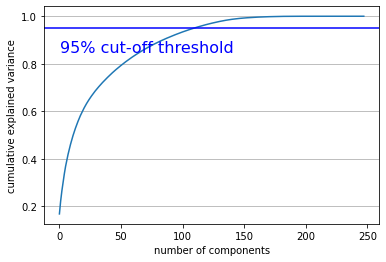

In [42]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'blue', fontsize=16)
plt.grid(axis = 'y')
plt.show()

In [43]:
pca = PCA(n_components=110)

X_std_pca = pca.fit_transform(X_std)
print(X_std_pca.shape)
print(X_std_pca)

(804, 110)
[[-2.16172401 -0.10748036  1.37079774 ... -0.12449077  0.09422499
   0.21978242]
 [-0.76485673 -4.15737013  1.76463687 ... -1.03100288  0.55648684
  -1.30126898]
 [-0.71224627 -2.67934711 -1.5631943  ...  1.16775394  0.13986529
   0.34866847]
 ...
 [ 0.99810799  0.81134533  1.38358842 ... -0.64270461  0.60315615
   0.10200311]
 [-0.88728906  1.15300719  0.93718075 ...  0.16905025  0.62195125
   0.43783156]
 [-1.03926421  0.31183603  0.816626   ...  0.12271378  0.18926821
   0.15018164]]


In [44]:
len(X_std_pca[0])

110

In [45]:
colonnes=[]
for i in range(110):
    colonnes.append('x'+str(i))

In [46]:
colonnes

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109']

In [47]:
df=pd.DataFrame(X_std_pca,columns=colonnes)

In [48]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109
0,-2.161724,-0.107480,1.370798,-1.762400,-0.646815,-1.316957,-0.227171,-0.297539,-0.786510,-0.286152,...,-0.646675,-0.090088,-0.349313,-1.303196,-0.669578,0.808580,0.371387,-0.124491,0.094225,0.219782
1,-0.764857,-4.157370,1.764637,-2.353302,0.862083,-1.063727,1.001096,1.109511,0.627867,0.602988,...,-0.254221,-0.401872,2.152312,0.115159,-0.093982,-0.213930,-0.193364,-1.031003,0.556487,-1.301269
2,-0.712246,-2.679347,-1.563194,-1.273481,-0.061863,-0.433151,0.881236,-0.145770,-0.996630,1.222216,...,-1.063721,0.592773,0.137671,-0.181145,-0.345802,0.352461,-0.467412,1.167754,0.139865,0.348668
3,-0.670347,0.260886,2.099832,-1.866303,-0.868431,-0.890911,-0.601528,-1.249887,-0.767871,-0.179452,...,0.729400,-0.198461,0.665028,0.305289,0.128020,0.173939,1.057273,1.333075,0.985250,0.347354
4,-0.674797,0.568048,-3.560768,-0.293220,-1.631943,-0.589292,0.781039,1.465683,0.059795,0.658920,...,0.095140,-0.274677,-0.223786,-0.128119,0.596735,-1.864593,1.547733,0.096124,-1.656998,-0.151550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,-1.508548,0.635159,0.844917,-1.717388,0.202785,-1.969682,0.356227,0.565962,-0.287053,-1.547482,...,0.774960,0.346217,-0.400316,0.920672,-1.088229,-0.607324,0.531279,-0.579331,0.163659,-0.785945
800,0.895409,1.376500,0.162587,-0.720494,0.905974,-0.732954,0.461475,0.178754,-0.586210,-1.143283,...,0.247034,0.597703,-0.192512,0.449020,-0.069809,-0.634927,0.620993,-0.421943,1.011147,-0.279052
801,0.998108,0.811345,1.383588,-0.821147,1.125128,0.469358,-0.971029,-0.764898,0.241356,-0.945329,...,0.496927,0.199473,-0.027371,-0.840952,-0.478505,0.095514,-0.134096,-0.642705,0.603156,0.102003
802,-0.887289,1.153007,0.937181,-0.690832,1.256104,-0.442011,0.783550,0.358864,0.465993,-1.104763,...,-0.266150,-0.044343,-0.119479,-1.188557,0.106692,-0.287970,0.328029,0.169050,0.621951,0.437832


# Change annotation

In [49]:
ann = wf.rdann('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//210', 'atr', sampto=5000, return_label_elements=['symbol'],  summarize_labels=False)
L=[]
for j in ann.symbol:
    if j not in NonBeat:
        L.append(j)
 

In [50]:
len(ann.symbol)

23

In [51]:
len(L)

22

In [52]:
k=[]
for i in range(len(patients)):
    ann = wf.rdann('C://Users//Nada Najari//Downloads//mit-bih-arrhythmia-database-1.0.0//mit-bih-arrhythmia-database-1.0.0//'+patients[i], 'atr', sampto=5000, return_label_elements=['symbol'],  summarize_labels=False)
    L=[]
    for j in ann.symbol:
        if j not in NonBeat:
            L.append(j)
    if patients[i]=='104':
        L.pop()
    elif patients[i]=='107':
        L.pop(6)
    elif patients[i]=='203':
        L.pop(20)
    elif patients[i]=='208':
        L.pop()
        L.pop(6)
    elif patients[i]=='210':
        L.pop(17)
    elif patients[i]=='221':
        L.pop(5)
    k.extend(L)
        

In [53]:
patientsd = ['101','102','103','105','106',
           '108','109','112','118','119','122','200',
           '201','203','207',
           '212','213','215','219',
           '222','233','234']
patientsk = ['104','107','116',
           '118','123','207','208','210','214','220','233']

In [54]:
for i in range(len(patientsd)):
    k.pop()
for i in range(len(patientsk)):
    k.pop(0)

In [55]:
df1 = pd.DataFrame(k,columns=['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

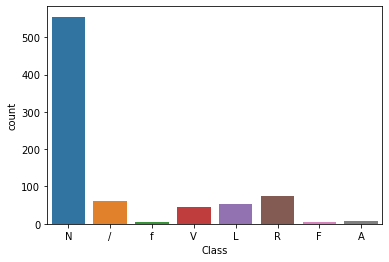

In [56]:
sns.countplot(x='Class',data=df1)

## Data Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, df1['Class'], test_size = 0.3, random_state=1)

## Modeling: KNN

In [58]:
model = KNeighborsClassifier(n_neighbors=8, weights='uniform')
model
import sklearn
# Model training
model.fit(X_train,y_train)
# Model predictions on the trained data
y_train_pred = model.predict(X_train)
print('Accuracy d\'entrainement' ,sklearn.metrics.accuracy_score(y_train,y_train_pred))
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Accuracy d'entrainement 0.7224199288256228
K-fold CV average score: 0.69


In [59]:
y_test_pred =model.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test,y_test_pred))

0.6776859504132231


## Test Accuracy

In [62]:
y_test_pred =model.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test,y_test_pred))

#model.score(X_test, y_test)

0.6859504132231405


## Binary Classification

In [63]:
M=[]
for i in range(len (k)):
    if k[i] not in Normal:
        M.append('A')
    else:
        M.append(k[i])

In [64]:
len(M)
df2 = pd.DataFrame(M,columns=['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

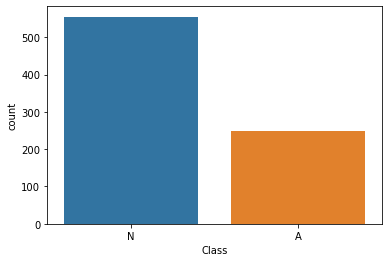

In [65]:
sns.countplot(x='Class',data=df2)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df, df2['Class'], test_size = 0.3, random_state=1)

In [67]:
model = KNeighborsClassifier(leaf_size= 15, n_neighbors=2, weights='uniform')

model

# Model training
model.fit(X_train,y_train)
#print(model.score(X_train,y_train))
#model.score(X_test,y_test)
# Model predictions on the trained data
y_train_pred = model.predict(X_train)
print('Accuracy d\'entrainement',sklearn.metrics.accuracy_score(y_train,y_train_pred))
#print(model)
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Accuracy d'entrainement 0.9145907473309609
K-fold CV average score: 0.68


## Test Accuracy

In [68]:
y_test_pred =model.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test,y_test_pred))


0.7148760330578512
